# ME5311-PROJECT:
# Climate Data Analysis: Preprocessing and Preliminary Analysis of Sea Level Pressure and Two-Meter Temperature Data

In [4]:
# Import necessary libraries
import os
import xarray as xr
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

dimensions of data

In [5]:
n_samples = 16071
n_latitudes = 101
n_longitudes = 161
shape = (n_samples, n_latitudes, n_longitudes)

In [6]:
path = 'data'
slp_path = os.path.join(path,'slp.nc')
t2m_path = os.path.join(path,'t2m.nc')

# load data
ds_slp = xr.open_dataset(slp_path)  # Load sea level pressure data
print(f"ds_slp:{ds_slp}")
ds_t2m = xr.open_dataset(t2m_path)  # Load two-meter temperature data
print(f"ds_t2m:{ds_t2m}")

ds_slp:<xarray.Dataset>
Dimensions:    (time: 16071, longitude: 161, latitude: 101)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T11:30:00 ... 2022-12-31T11:30:00
  * longitude  (longitude) float32 70.0 70.5 71.0 71.5 ... 149.0 149.5 150.0
  * latitude   (latitude) float32 40.0 39.5 39.0 38.5 ... -8.5 -9.0 -9.5 -10.0
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    history:      Mon Feb 05 11:54:26 2024: cdo -b 32 mergetime daily_slp1979...
    Conventions:  CF-1.6
    frequency:    day
    CDO:          Climate Data Operators version 1.9.4rc1 (http://mpimet.mpg....
ds_t2m:<xarray.Dataset>
Dimensions:    (time: 16071, longitude: 161, latitude: 101)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T11:30:00 ... 2022-12-31T11:30:00
  * longitude  (longitude) float32 70.0 70.5 71.0 71.5 ... 149.0 149.5 150.0
  * latitude   (latitude) float32 40.0

get data values for sea level pressure

In [7]:
da_slp_msl = ds_slp['msl']  # 'msl' is the variable name for sea level pressure
x_slp = da_slp_msl.values
print(x_slp)
# print(x_slp.shape)

[[[101943.086 101989.92  102015.8   ... 101418.664 101386.12  101350.54 ]
  [102027.68  102279.96  102562.85  ... 101468.    101434.67  101401.91 ]
  [102285.22  102462.836 102559.64  ... 101519.43  101490.62  101461.56 ]
  ...
  [101111.01  101109.06  101107.54  ... 100526.9   100510.74  100511.875]
  [101111.2   101109.19  101108.91  ... 100658.695 100566.766 100546.74 ]
  [101112.44  101111.15  101109.95  ... 100591.01  100736.766 100558.74 ]]

 [[101900.16  101947.945 101967.85  ... 101238.516 101203.34  101165.47 ]
  [102038.18  102291.54  102573.29  ... 101279.555 101243.47  101208.89 ]
  [102372.15  102490.29  102545.21  ... 101317.945 101284.52  101252.086]
  ...
  [101124.08  101122.53  101119.734 ... 100458.69  100445.914 100452.65 ]
  [101126.08  101124.484 101118.62  ... 100604.086 100507.03  100489.336]
  [101126.445 101124.984 101117.35  ... 100552.    100682.836 100492.414]]

 [[101973.01  102020.375 102048.44  ... 101409.29  101399.12  101386.37 ]
  [102356.09  102605.1

get data values for two-meter temperature

In [8]:
da_t2m_t2m = ds_t2m['t2m']  # 't2m' is the variable name for two-meter temperature
x_t2m = da_t2m_t2m.values
print(x_t2m)
# print(x_t2m.shape)

[[[273.28217 272.29355 272.3532  ... 278.57904 278.7337  278.90683]
  [260.34695 257.77417 255.57187 ... 279.697   279.75113 279.85916]
  [267.08688 265.21936 261.89755 ... 280.44757 280.40872 280.45724]
  ...
  [299.5844  299.59753 299.64648 ... 299.56076 300.1212  300.32434]
  [299.5824  299.66254 299.65182 ... 297.05234 299.19998 299.27313]
  [299.76086 299.7094  299.669   ... 296.93024 295.269   298.79196]]

 [[274.14554 274.5057  276.38028 ... 279.28534 279.46838 279.65353]
  [261.9656  260.73248 259.91565 ... 280.26804 280.3096  280.36096]
  [266.8752  264.50937 261.25928 ... 280.97006 280.9831  280.9806 ]
  ...
  [299.7329  299.81882 299.80908 ... 299.68384 300.15683 300.06952]
  [299.7395  299.70724 299.9033  ... 296.7881  299.29776 298.99582]
  [299.72818 299.77933 300.20435 ... 296.58835 295.2061  298.81598]]

 [[274.2645  275.10245 277.218   ... 281.18222 281.30457 281.47153]
  [262.3486  260.37915 259.7292  ... 282.38742 282.32388 282.24146]
  [266.22104 264.1264  260.57538

get time snapshots from sea level pressure dataset

In [9]:
da_slp_time = ds_slp['time']
t_slp = da_slp_time.values
print(t_slp)

['1979-01-01T11:30:00.000000000' '1979-01-02T11:30:00.000000000'
 '1979-01-03T11:30:00.000000000' ... '2022-12-29T11:30:00.000000000'
 '2022-12-30T11:30:00.000000000' '2022-12-31T11:30:00.000000000']


get time snapshots from two-meter temperature dataset

In [10]:
da_t2m_time = ds_t2m['time']
t_t2m = da_t2m_time.values
print(t_t2m)

['1979-01-01T11:30:00.000000000' '1979-01-02T11:30:00.000000000'
 '1979-01-03T11:30:00.000000000' ... '2022-12-29T11:30:00.000000000'
 '2022-12-30T11:30:00.000000000' '2022-12-31T11:30:00.000000000']


get longitude values from sea level pressure dataset

In [11]:
da_slp_longitude = ds_slp['longitude']
lon_slp = da_slp_longitude.values
print(lon_slp)

[ 70.   70.5  71.   71.5  72.   72.5  73.   73.5  74.   74.5  75.   75.5
  76.   76.5  77.   77.5  78.   78.5  79.   79.5  80.   80.5  81.   81.5
  82.   82.5  83.   83.5  84.   84.5  85.   85.5  86.   86.5  87.   87.5
  88.   88.5  89.   89.5  90.   90.5  91.   91.5  92.   92.5  93.   93.5
  94.   94.5  95.   95.5  96.   96.5  97.   97.5  98.   98.5  99.   99.5
 100.  100.5 101.  101.5 102.  102.5 103.  103.5 104.  104.5 105.  105.5
 106.  106.5 107.  107.5 108.  108.5 109.  109.5 110.  110.5 111.  111.5
 112.  112.5 113.  113.5 114.  114.5 115.  115.5 116.  116.5 117.  117.5
 118.  118.5 119.  119.5 120.  120.5 121.  121.5 122.  122.5 123.  123.5
 124.  124.5 125.  125.5 126.  126.5 127.  127.5 128.  128.5 129.  129.5
 130.  130.5 131.  131.5 132.  132.5 133.  133.5 134.  134.5 135.  135.5
 136.  136.5 137.  137.5 138.  138.5 139.  139.5 140.  140.5 141.  141.5
 142.  142.5 143.  143.5 144.  144.5 145.  145.5 146.  146.5 147.  147.5
 148.  148.5 149.  149.5 150. ]


get latitude values from sea level pressure dataset

In [12]:
da_slp_latitude = ds_slp['latitude']
lat_slp = da_slp_latitude.values
print(lat_slp)

[ 40.   39.5  39.   38.5  38.   37.5  37.   36.5  36.   35.5  35.   34.5
  34.   33.5  33.   32.5  32.   31.5  31.   30.5  30.   29.5  29.   28.5
  28.   27.5  27.   26.5  26.   25.5  25.   24.5  24.   23.5  23.   22.5
  22.   21.5  21.   20.5  20.   19.5  19.   18.5  18.   17.5  17.   16.5
  16.   15.5  15.   14.5  14.   13.5  13.   12.5  12.   11.5  11.   10.5
  10.    9.5   9.    8.5   8.    7.5   7.    6.5   6.    5.5   5.    4.5
   4.    3.5   3.    2.5   2.    1.5   1.    0.5   0.   -0.5  -1.   -1.5
  -2.   -2.5  -3.   -3.5  -4.   -4.5  -5.   -5.5  -6.   -6.5  -7.   -7.5
  -8.   -8.5  -9.   -9.5 -10. ]


ONLY if not enough memory

In [13]:
# OPTIONAL: Reduce resolution if not enough memory
# Reduce resolution for sea level pressure dataset
# low_res_ds_slp = ds_slp[{'longitude': slice(None, None, 2), 'latitude': slice(None, None, 2)}]
# low_res_ds_slp.to_netcdf(path='slp_low_res.nc')
#
# # Reduce resolution for two-meter temperature dataset
# low_res_ds_t2m = ds_t2m[{'longitude': slice(None, None, 2), 'latitude': slice(None, None, 2)}]
# low_res_ds_t2m.to_netcdf(path='t2m_low_res.nc')


Calculate and print basic statistical description for sea level pressure

In [14]:
print(f"SLP Mean: {da_slp_msl.mean().values}")
print(f"SLP Std: {da_slp_msl.std().values}")
print(f"SLP Min: {da_slp_msl.min().values}")
print(f"SLP Max: {da_slp_msl.max().values}")


SLP Mean: 101162.1171875
SLP Std: 33210.453125
SLP Min: 94823.578125
SLP Max: 106382.25


Calculate and print basic statistical description for two-meter temperature

In [15]:
print(f"T2M Mean: {da_t2m_t2m.mean().values}")
print(f"T2M Std: {da_t2m_t2m.std().values}")
print(f"T2M Min: {da_t2m_t2m.min().values}")
print(f"T2M Max: {da_t2m_t2m.max().values}")

T2M Mean: 295.2440490722656
T2M Std: 91.73178100585938
T2M Min: 229.27230834960938
T2M Max: 316.29010009765625


Print time range for sea level pressure dataset

In [16]:
print("SLP Time Range:", ds_slp['time'].min().values, "to", ds_slp['time'].max().values)
time_list = ds_slp['time'].values
# 通过遍历打印每个时间点
for t in time_list:
    print(t)

SLP Time Range: 1979-01-01T11:30:00.000000000 to 2022-12-31T11:30:00.000000000
1979-01-01T11:30:00.000000000
1979-01-02T11:30:00.000000000
1979-01-03T11:30:00.000000000
1979-01-04T11:30:00.000000000
1979-01-05T11:30:00.000000000
1979-01-06T11:30:00.000000000
1979-01-07T11:30:00.000000000
1979-01-08T11:30:00.000000000
1979-01-09T11:30:00.000000000
1979-01-10T11:30:00.000000000
1979-01-11T11:30:00.000000000
1979-01-12T11:30:00.000000000
1979-01-13T11:30:00.000000000
1979-01-14T11:30:00.000000000
1979-01-15T11:30:00.000000000
1979-01-16T11:30:00.000000000
1979-01-17T11:30:00.000000000
1979-01-18T11:30:00.000000000
1979-01-19T11:30:00.000000000
1979-01-20T11:30:00.000000000
1979-01-21T11:30:00.000000000
1979-01-22T11:30:00.000000000
1979-01-23T11:30:00.000000000
1979-01-24T11:30:00.000000000
1979-01-25T11:30:00.000000000
1979-01-26T11:30:00.000000000
1979-01-27T11:30:00.000000000
1979-01-28T11:30:00.000000000
1979-01-29T11:30:00.000000000
1979-01-30T11:30:00.000000000
1979-01-31T11:30:00.0

Print time range for two-meter temperature dataset

In [17]:
print("T2M Time Range:", ds_t2m['time'].min().values, "to", ds_t2m['time'].max().values)
time_list = ds_t2m['time'].values
# 通过遍历打印每个时间点
for t in time_list:
    print(t)


T2M Time Range: 1979-01-01T11:30:00.000000000 to 2022-12-31T11:30:00.000000000
1979-01-01T11:30:00.000000000
1979-01-02T11:30:00.000000000
1979-01-03T11:30:00.000000000
1979-01-04T11:30:00.000000000
1979-01-05T11:30:00.000000000
1979-01-06T11:30:00.000000000
1979-01-07T11:30:00.000000000
1979-01-08T11:30:00.000000000
1979-01-09T11:30:00.000000000
1979-01-10T11:30:00.000000000
1979-01-11T11:30:00.000000000
1979-01-12T11:30:00.000000000
1979-01-13T11:30:00.000000000
1979-01-14T11:30:00.000000000
1979-01-15T11:30:00.000000000
1979-01-16T11:30:00.000000000
1979-01-17T11:30:00.000000000
1979-01-18T11:30:00.000000000
1979-01-19T11:30:00.000000000
1979-01-20T11:30:00.000000000
1979-01-21T11:30:00.000000000
1979-01-22T11:30:00.000000000
1979-01-23T11:30:00.000000000
1979-01-24T11:30:00.000000000
1979-01-25T11:30:00.000000000
1979-01-26T11:30:00.000000000
1979-01-27T11:30:00.000000000
1979-01-28T11:30:00.000000000
1979-01-29T11:30:00.000000000
1979-01-30T11:30:00.000000000
1979-01-31T11:30:00.0

# Visualization Check

Visualization Check for Sea Level Pressure

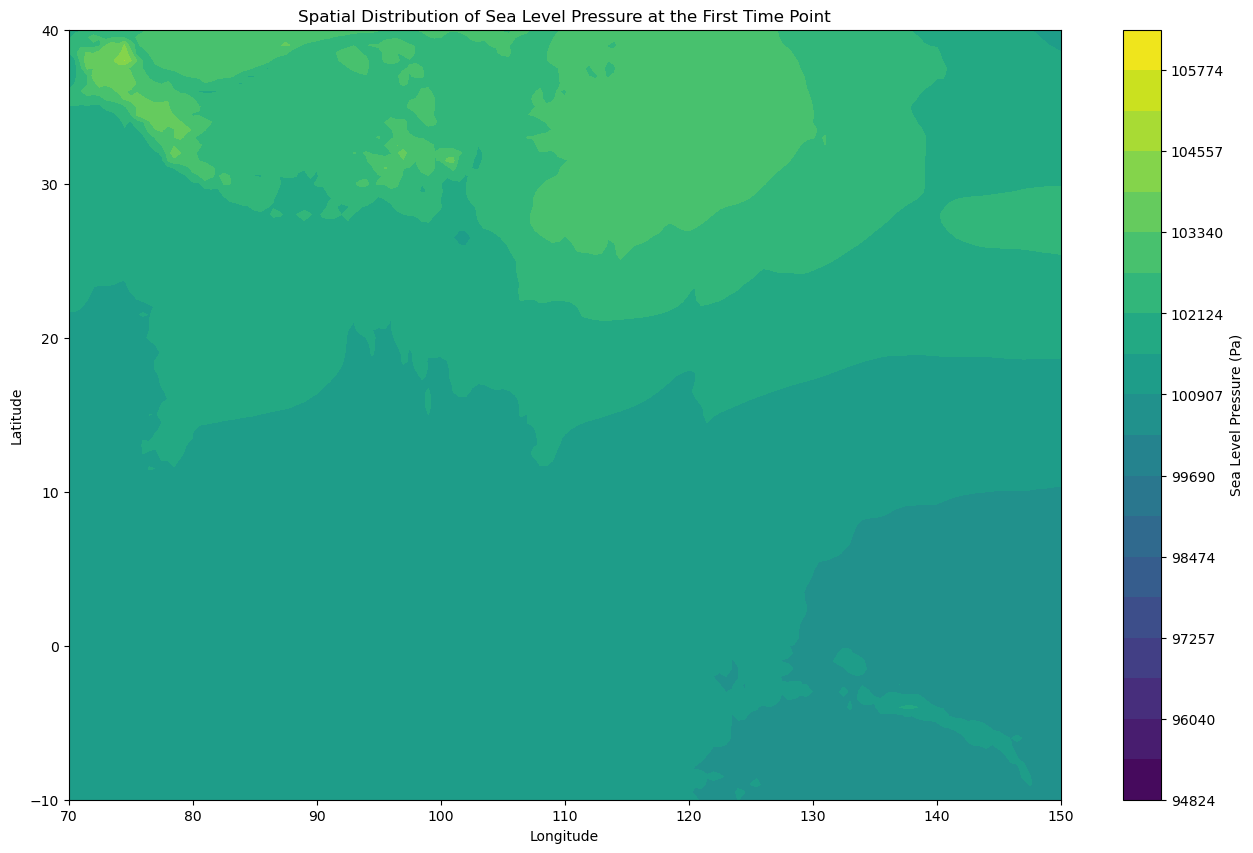

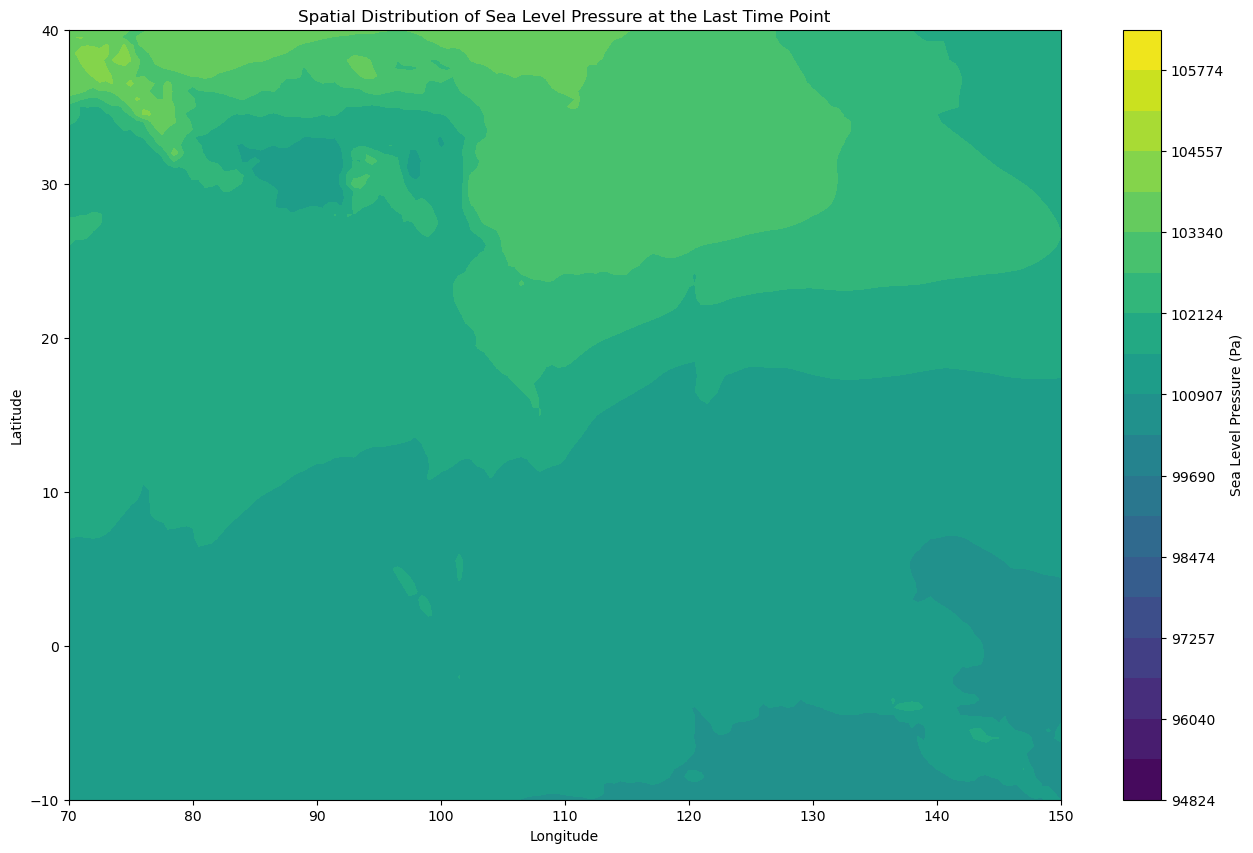

In [18]:
# Select data for the first time point for plotting
time_index = 0
# Plot the spatial distribution of Sea Level Pressure (SLP)
plt.figure(figsize=(16, 10))
plt.contourf(lon_slp, lat_slp, x_slp[time_index, :, :], cmap='viridis', levels=np.linspace(x_slp.min(), x_slp.max(), 20))
plt.colorbar(label='Sea Level Pressure (Pa)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Sea Level Pressure at the First Time Point')
plt.show()

# Plot the spatial distribution of Sea Level Pressure (SLP) for the last time point
time_index = -1
plt.figure(figsize=(16, 10))
plt.contourf(lon_slp, lat_slp, x_slp[time_index, :, :], cmap='viridis', levels=np.linspace(x_slp.min(), x_slp.max(), 20))
plt.colorbar(label='Sea Level Pressure (Pa)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Sea Level Pressure at the Last Time Point')
plt.show()

Visualization Check for Two-Meter Temperature

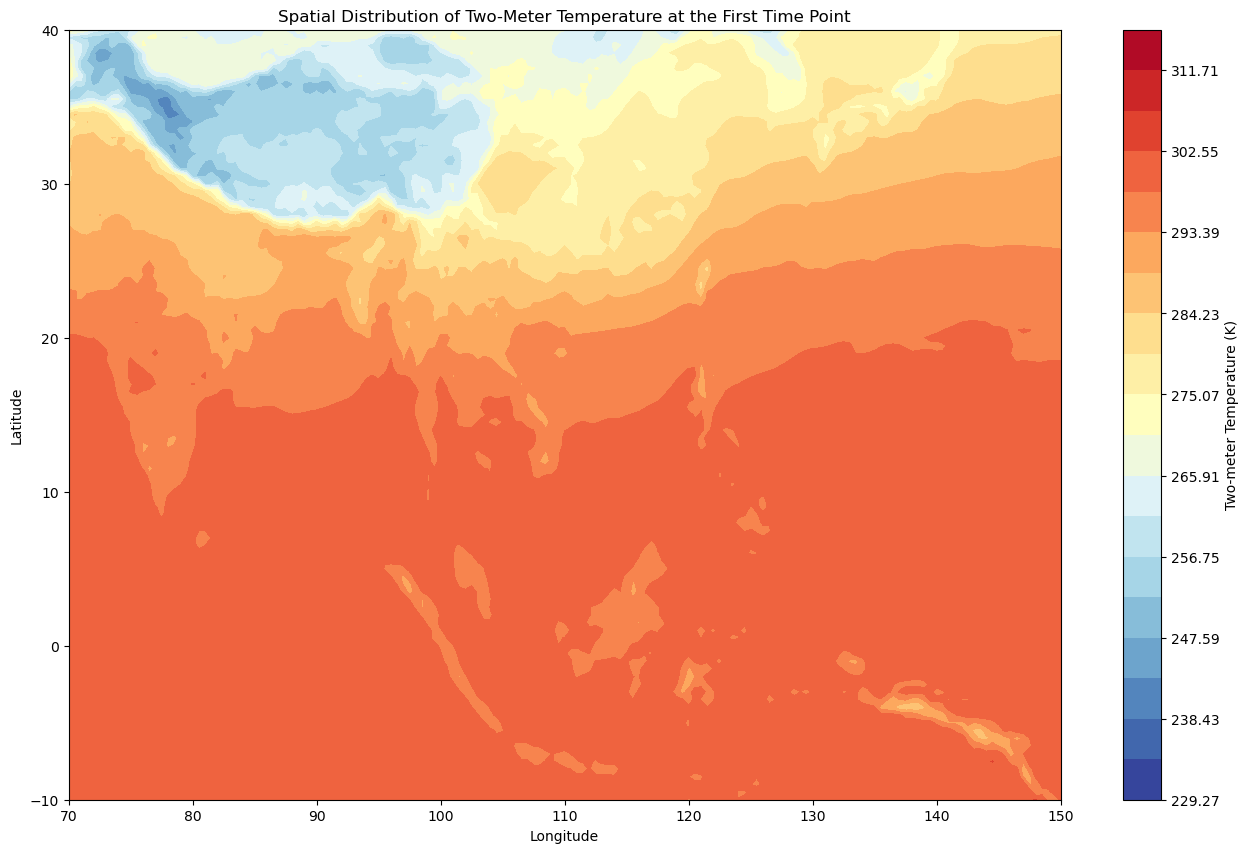

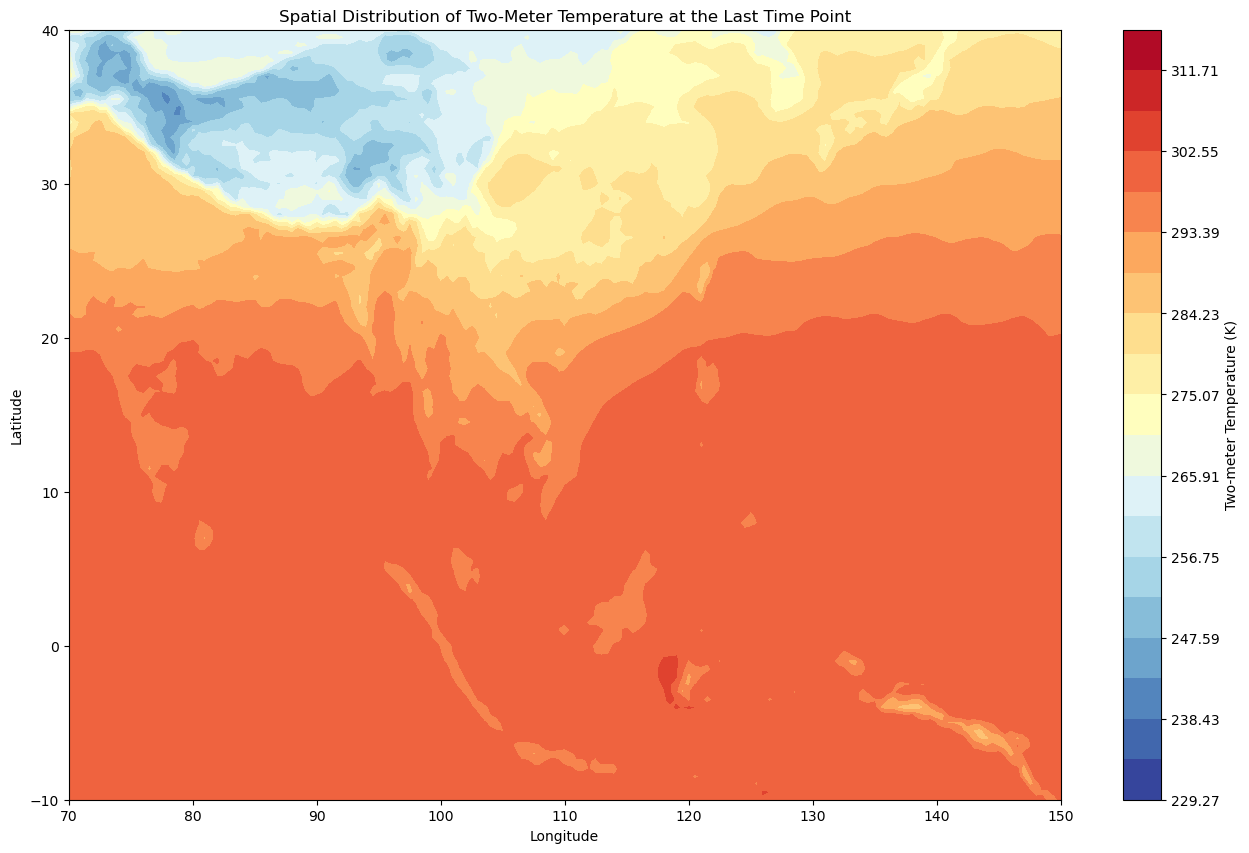

In [19]:
# Select data for the first time point for plotting
time_index = 0
# Plot the spatial distribution of Two-Meter Temperature (T2M)
plt.figure(figsize=(16, 10))
plt.contourf(lon_slp, lat_slp, x_t2m[time_index, :, :], cmap='RdYlBu_r', levels=np.linspace(x_t2m.min(), x_t2m.max(), 20))
plt.colorbar(label='Two-meter Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Two-Meter Temperature at the First Time Point')
plt.show()

# Plot the spatial distribution of Two-Meter Temperature (T2M) for the last time point
time_index = -1
plt.figure(figsize=(16, 10))
plt.contourf(lon_slp, lat_slp, x_t2m[time_index, :, :], cmap='RdYlBu_r', levels=np.linspace(x_t2m.min(), x_t2m.max(), 20))
plt.colorbar(label='Two-meter Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Two-Meter Temperature at the Last Time Point')
plt.show()

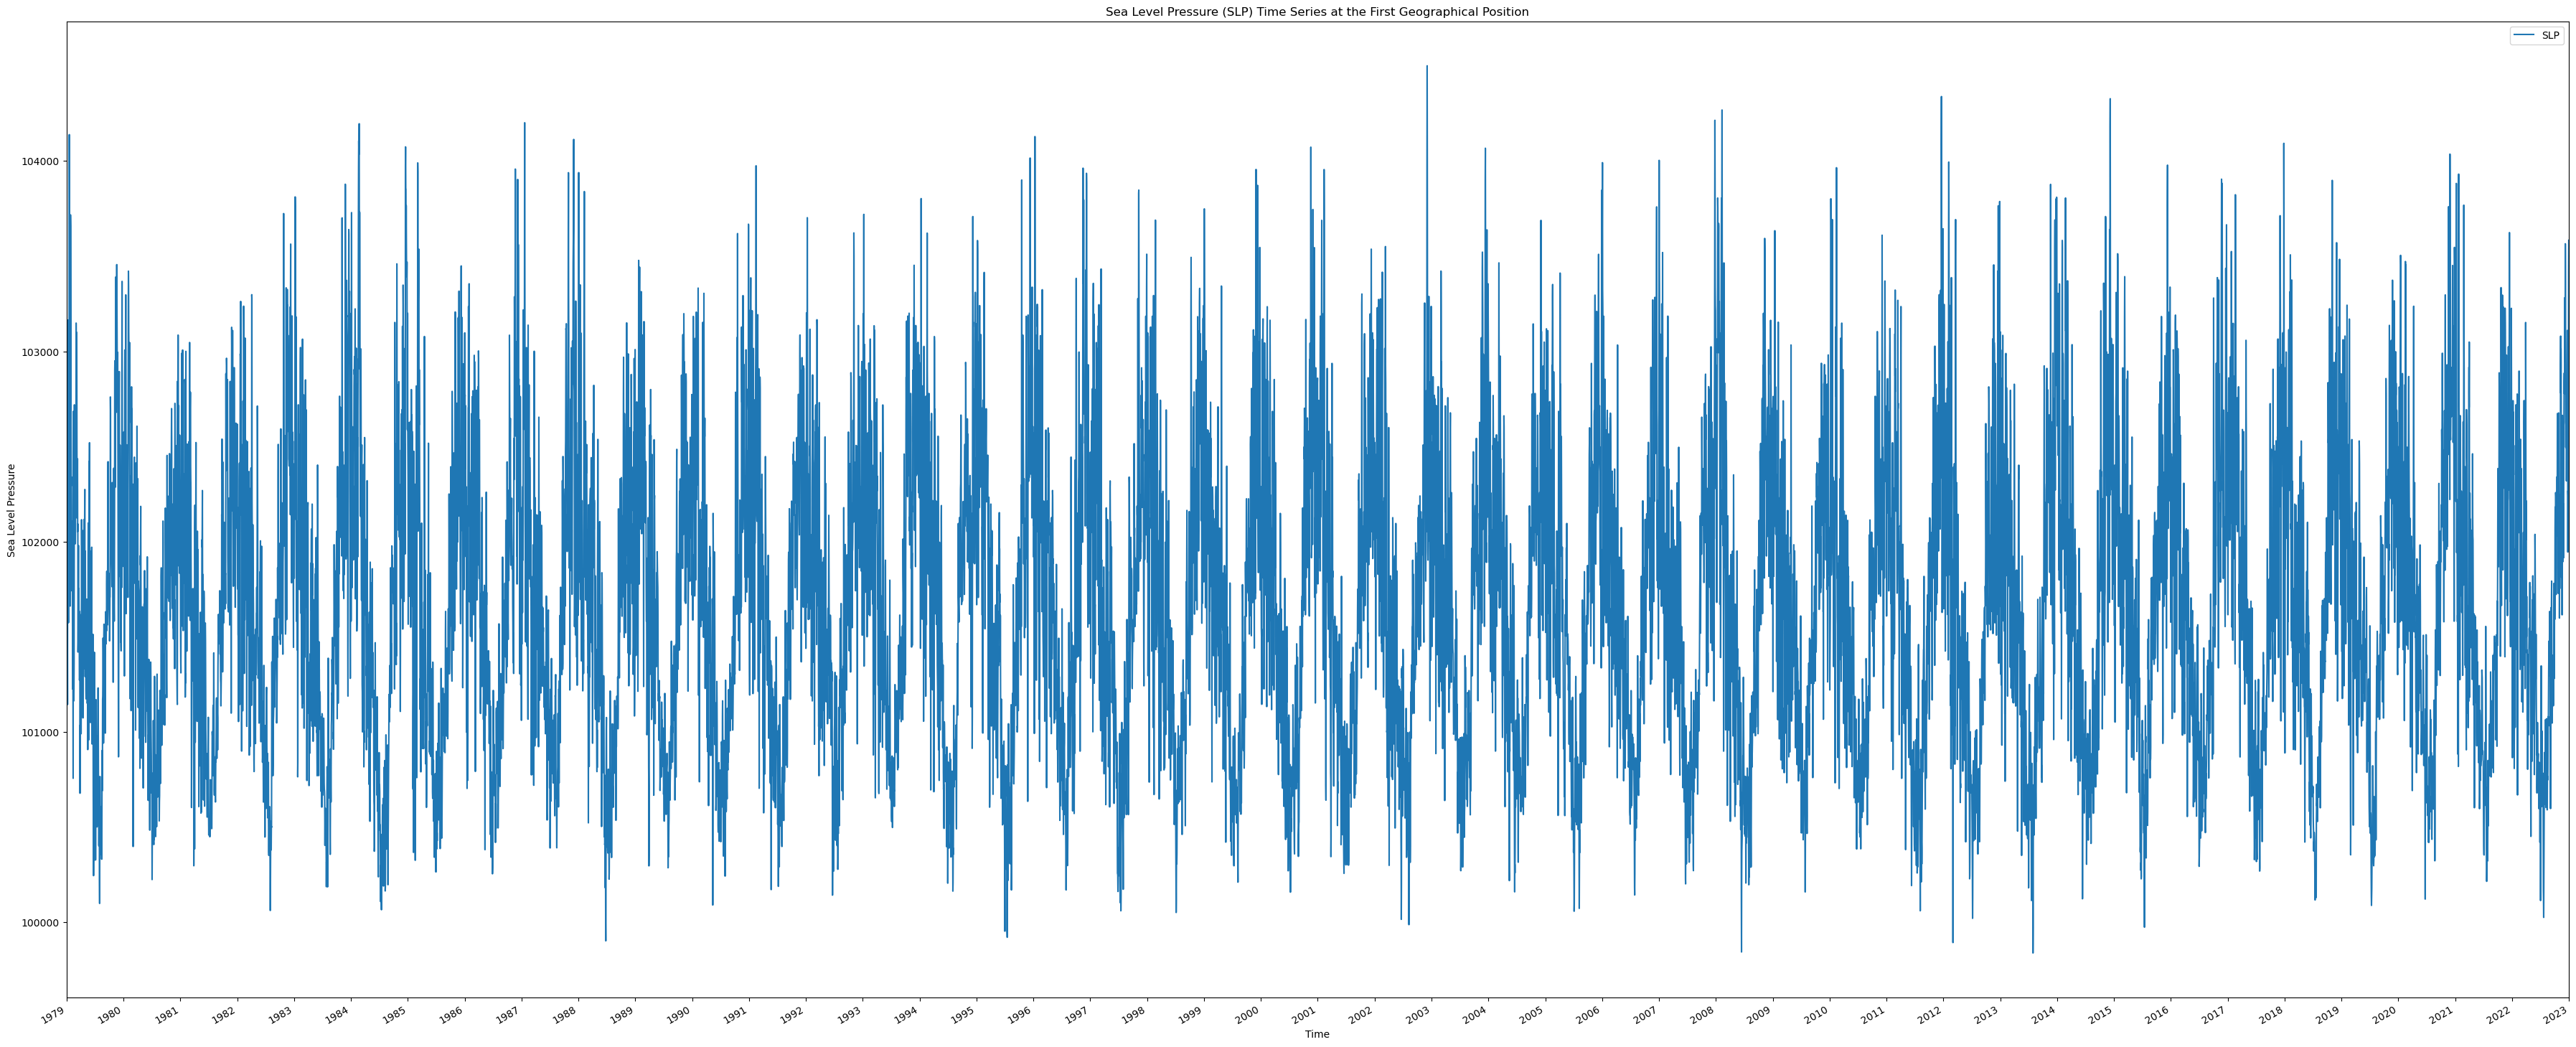

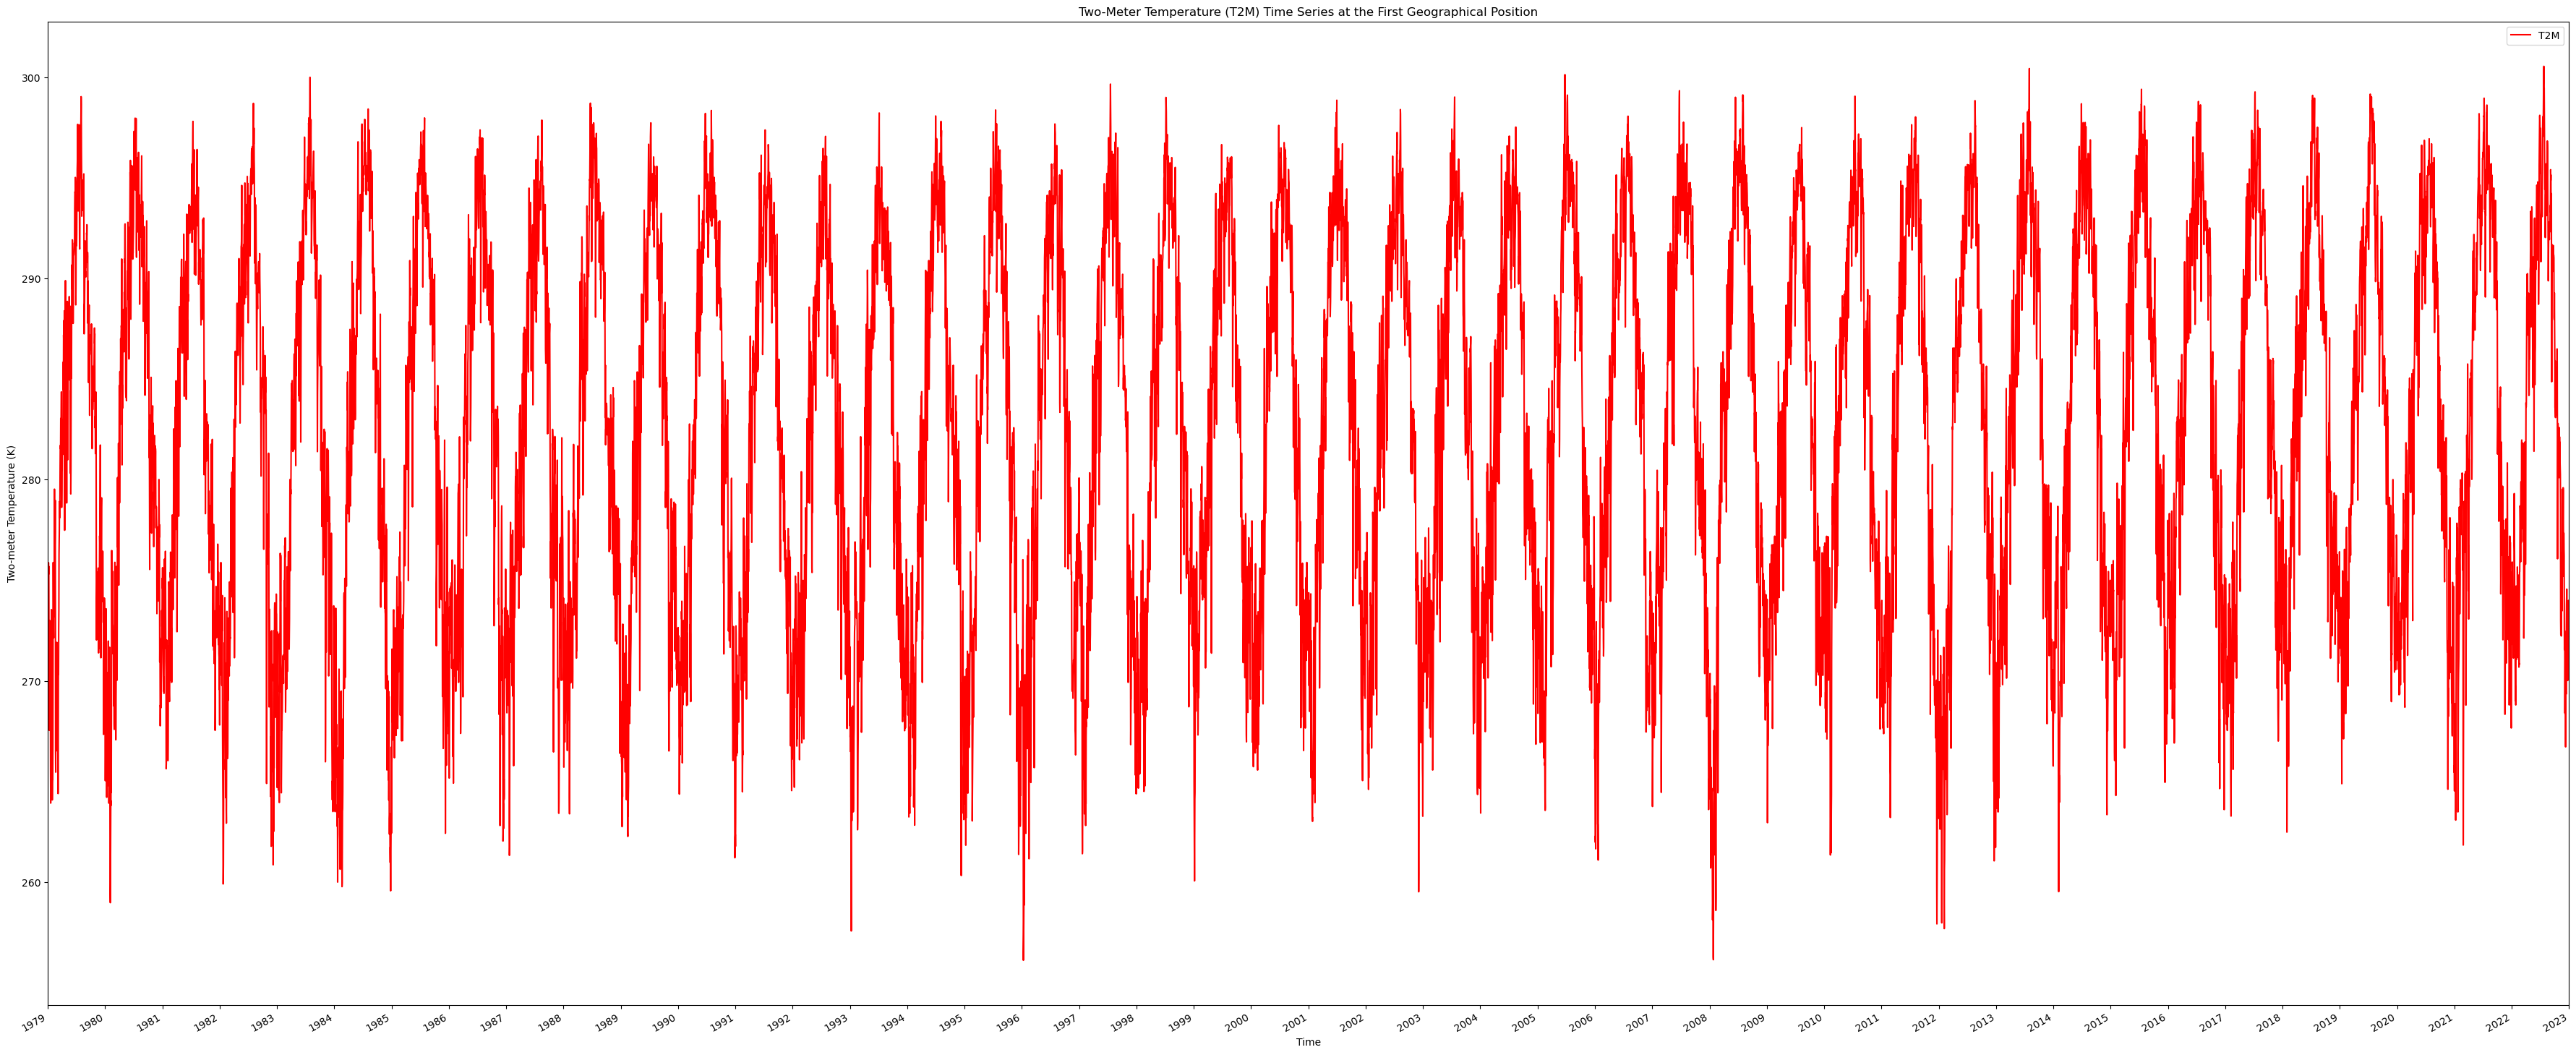

In [20]:
latitude_index = 0
longitude_index = 0

# Set the size of the chart
plt.figure(figsize=(45, 20))
# Plot the time series of Sea Level Pressure (SLP)
plt.plot(da_slp_time, x_slp[:, latitude_index, longitude_index], label='SLP')
# Set the range of the X-axis from 1979 to 2022
start_date = pd.to_datetime('1978-12-31')
end_date = pd.to_datetime('2023-01-01')
plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Automatically rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Sea Level Pressure')
plt.title('Sea Level Pressure (SLP) Time Series at the First Geographical Position')
plt.legend()
plt.show()

# Set the size of the chart
plt.figure(figsize=(45, 20))
# Plot the time series of Two-Meter Temperature (T2M)
plt.plot(da_t2m_time, x_t2m[:, latitude_index, longitude_index], label='T2M', color='r')
# Set the range of the X-axis from 1979 to 2022
start_date = pd.to_datetime('1978-12-31')
end_date = pd.to_datetime('2023-01-01')
plt.xlim(start_date, end_date)
# Set the date format on the X-axis for every year and ensure each year is marked
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Automatically rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Two-meter Temperature (K)')
plt.title('Two-Meter Temperature (T2M) Time Series at the First Geographical Position')
plt.legend()
plt.show()


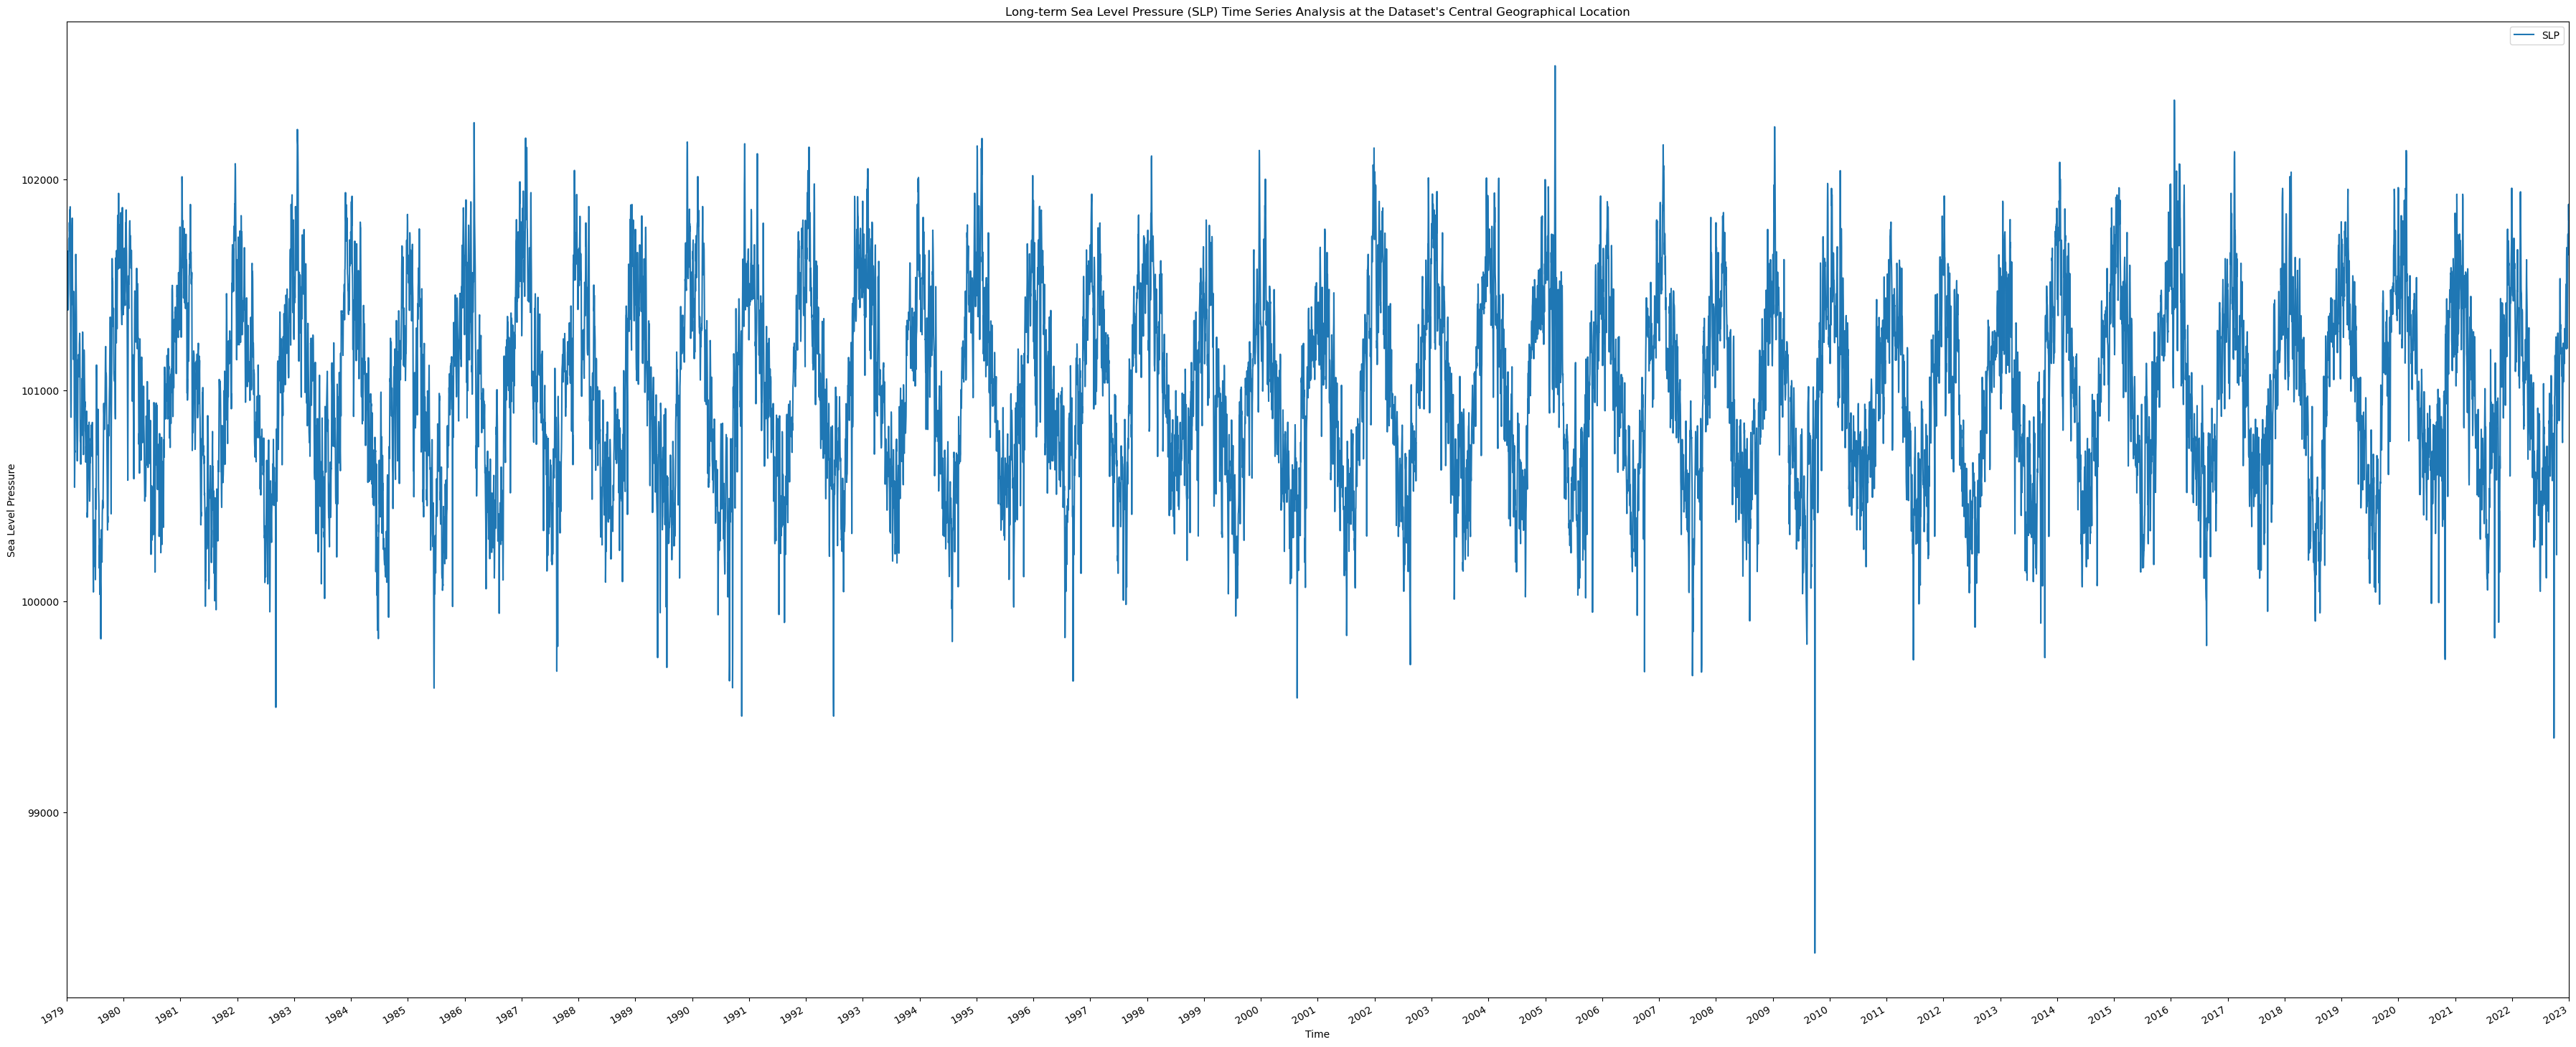

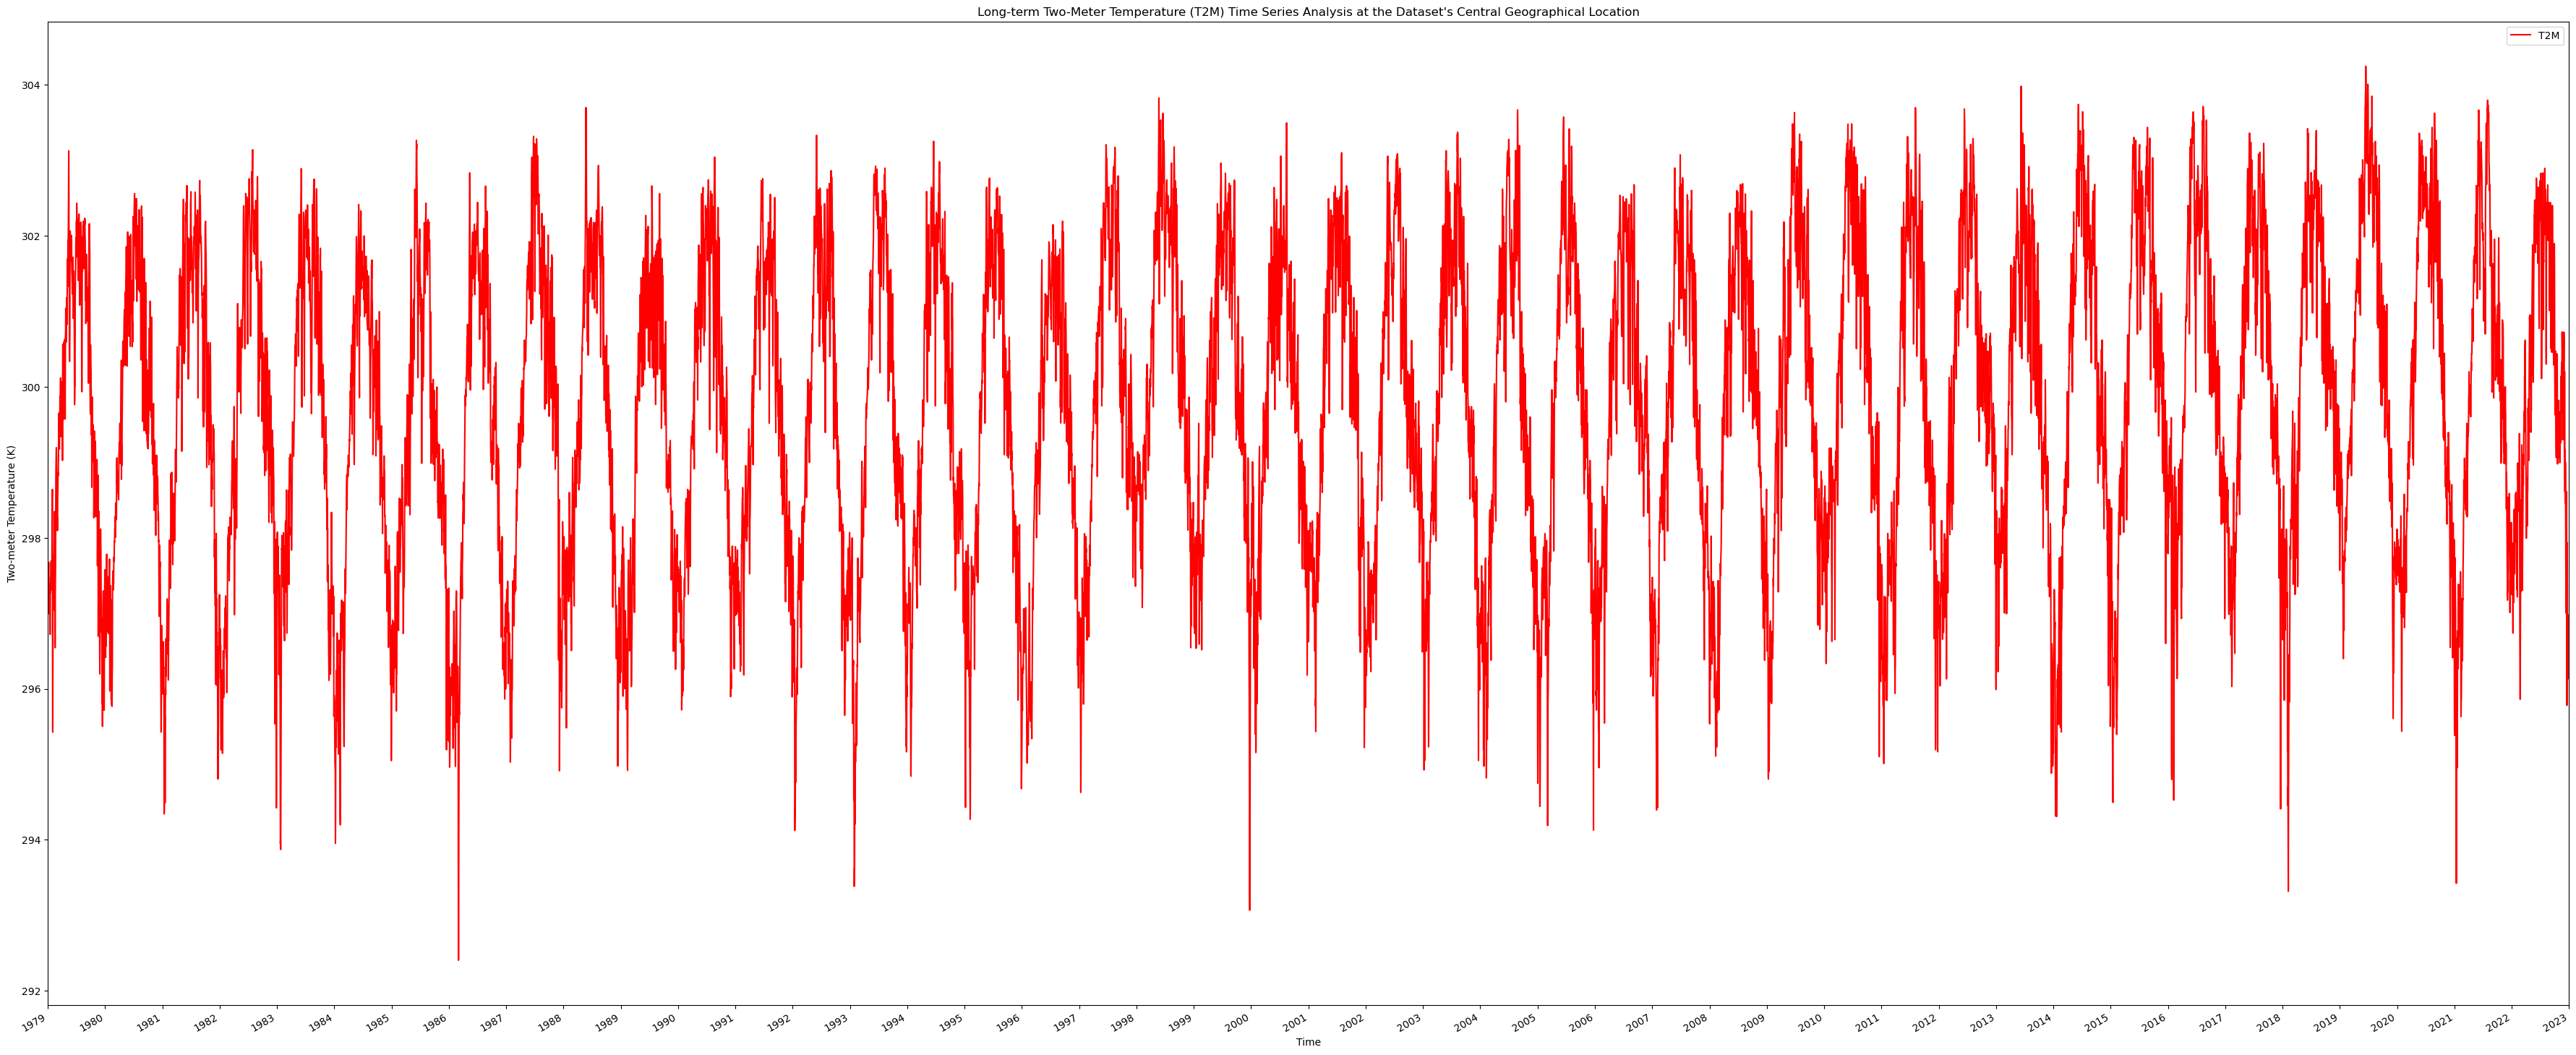

In [21]:
# Select the center latitude and longitude indices
latitude_index = n_latitudes // 2
longitude_index = n_longitudes // 2

# Set the size of the chart
plt.figure(figsize=(45, 20))
# Plot the time series of Sea Level Pressure (SLP)
plt.plot(da_slp_time, x_slp[:, latitude_index, longitude_index], label='SLP')
# Set the range of the X-axis from 1979 to 2022
start_date = pd.to_datetime('1978-12-31')
end_date = pd.to_datetime('2023-01-01')
plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Automatically rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Sea Level Pressure')
plt.title('Long-term Sea Level Pressure (SLP) Time Series Analysis at the Dataset\'s Central Geographical Location')
plt.legend()
plt.show()

# Set the size of the chart
plt.figure(figsize=(45, 20))
# Plot the time series of Two-Meter Temperature (T2M)
plt.plot(da_t2m_time, x_t2m[:, latitude_index, longitude_index], label='T2M', color='r')
# Set the range of the X-axis from 1979 to 2022
start_date = pd.to_datetime('1978-12-31')
end_date = pd.to_datetime('2023-01-01')
plt.xlim(start_date, end_date)
# Set the date format on the X-axis for every year and ensure each year is marked
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Automatically rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Two-meter Temperature (K)')
plt.title('Long-term Two-Meter Temperature (T2M) Time Series Analysis at the Dataset\'s Central Geographical Location')
plt.legend()
plt.show()


Pearson Correlation Coefficient: -0.8463649482029085, P-value: 0.0


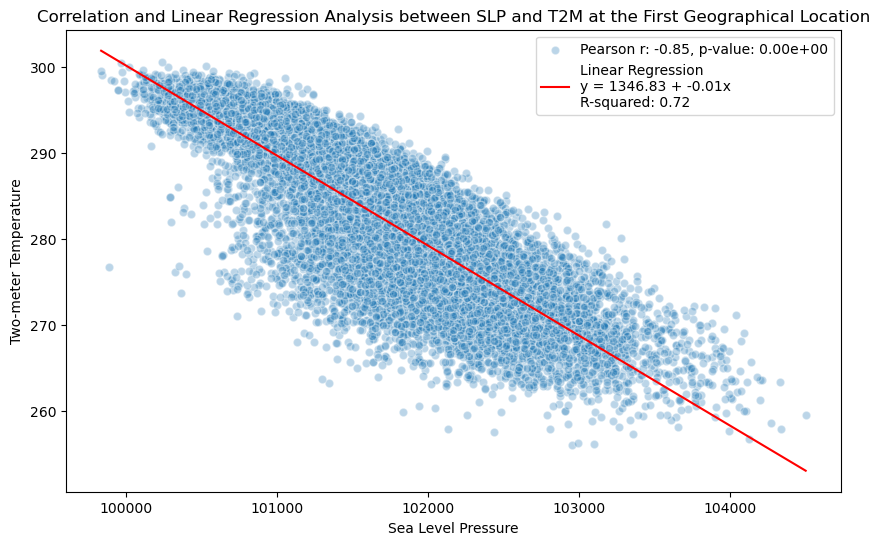

In [22]:
# Analyzing data for the first geographical location
slp_series = x_slp[:, 0, 0]
t2m_series = x_t2m[:, 0, 0]

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = pearsonr(slp_series, t2m_series)
print(f"Pearson Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")
# Perform linear regression
slope, intercept, r_value, p_value_reg, std_err = linregress(slp_series, t2m_series)
# Generate x and y values for the regression line
x_values = np.linspace(slp_series.min(), slp_series.max(), 500)  # Generate enough x values for a smooth line
y_values = intercept + slope * x_values
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(slp_series, t2m_series, alpha=0.3, edgecolors='w', label=f'Pearson r: {corr_coefficient:.2f}, p-value: {p_value:.2e}')
# Plot regression line
plt.plot(x_values, y_values, color='red', label=f'Linear Regression\ny = {intercept:.2f} + {slope:.2f}x\nR-squared: {r_value**2:.2f}')
# Add chart title and axis labels
plt.title('Correlation and Linear Regression Analysis between SLP and T2M at the First Geographical Location')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Two-meter Temperature')
plt.legend()
# Show chart
plt.show()

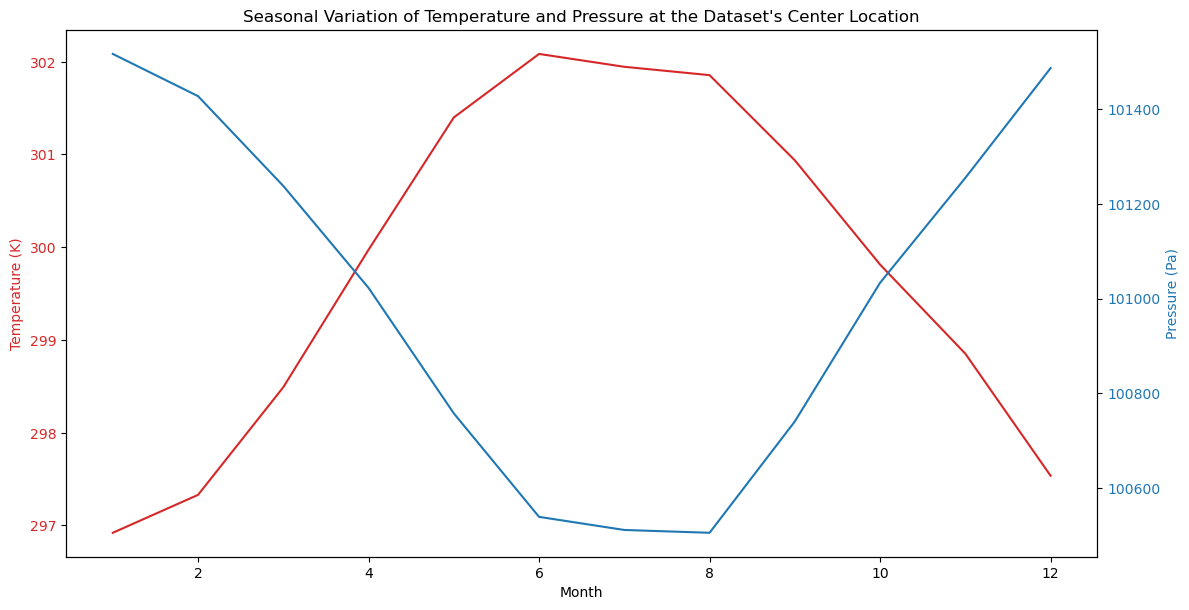

In [23]:
# Convert time to pandas datetime
times_pd = pd.to_datetime(t_slp)

# Select a specific location, the center of the dataset
lat_index = n_latitudes // 2
lon_index = n_longitudes // 2

# Extract temperature and pressure data for the center point
temp_center = ds_t2m['t2m'][:, lat_index, lon_index].groupby('time.month').mean()
pressure_center = ds_slp['msl'][:, lat_index, lon_index].groupby('time.month').mean()

# Plot the chart
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (K)', color=color)
ax1.plot(temp_center.month, temp_center, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Pressure (Pa)', color=color)
ax2.plot(pressure_center.month, pressure_center, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise, the right y-label might be slightly clipped
plt.title('Seasonal Variation of Temperature and Pressure at the Dataset\'s Center Location')
plt.show()

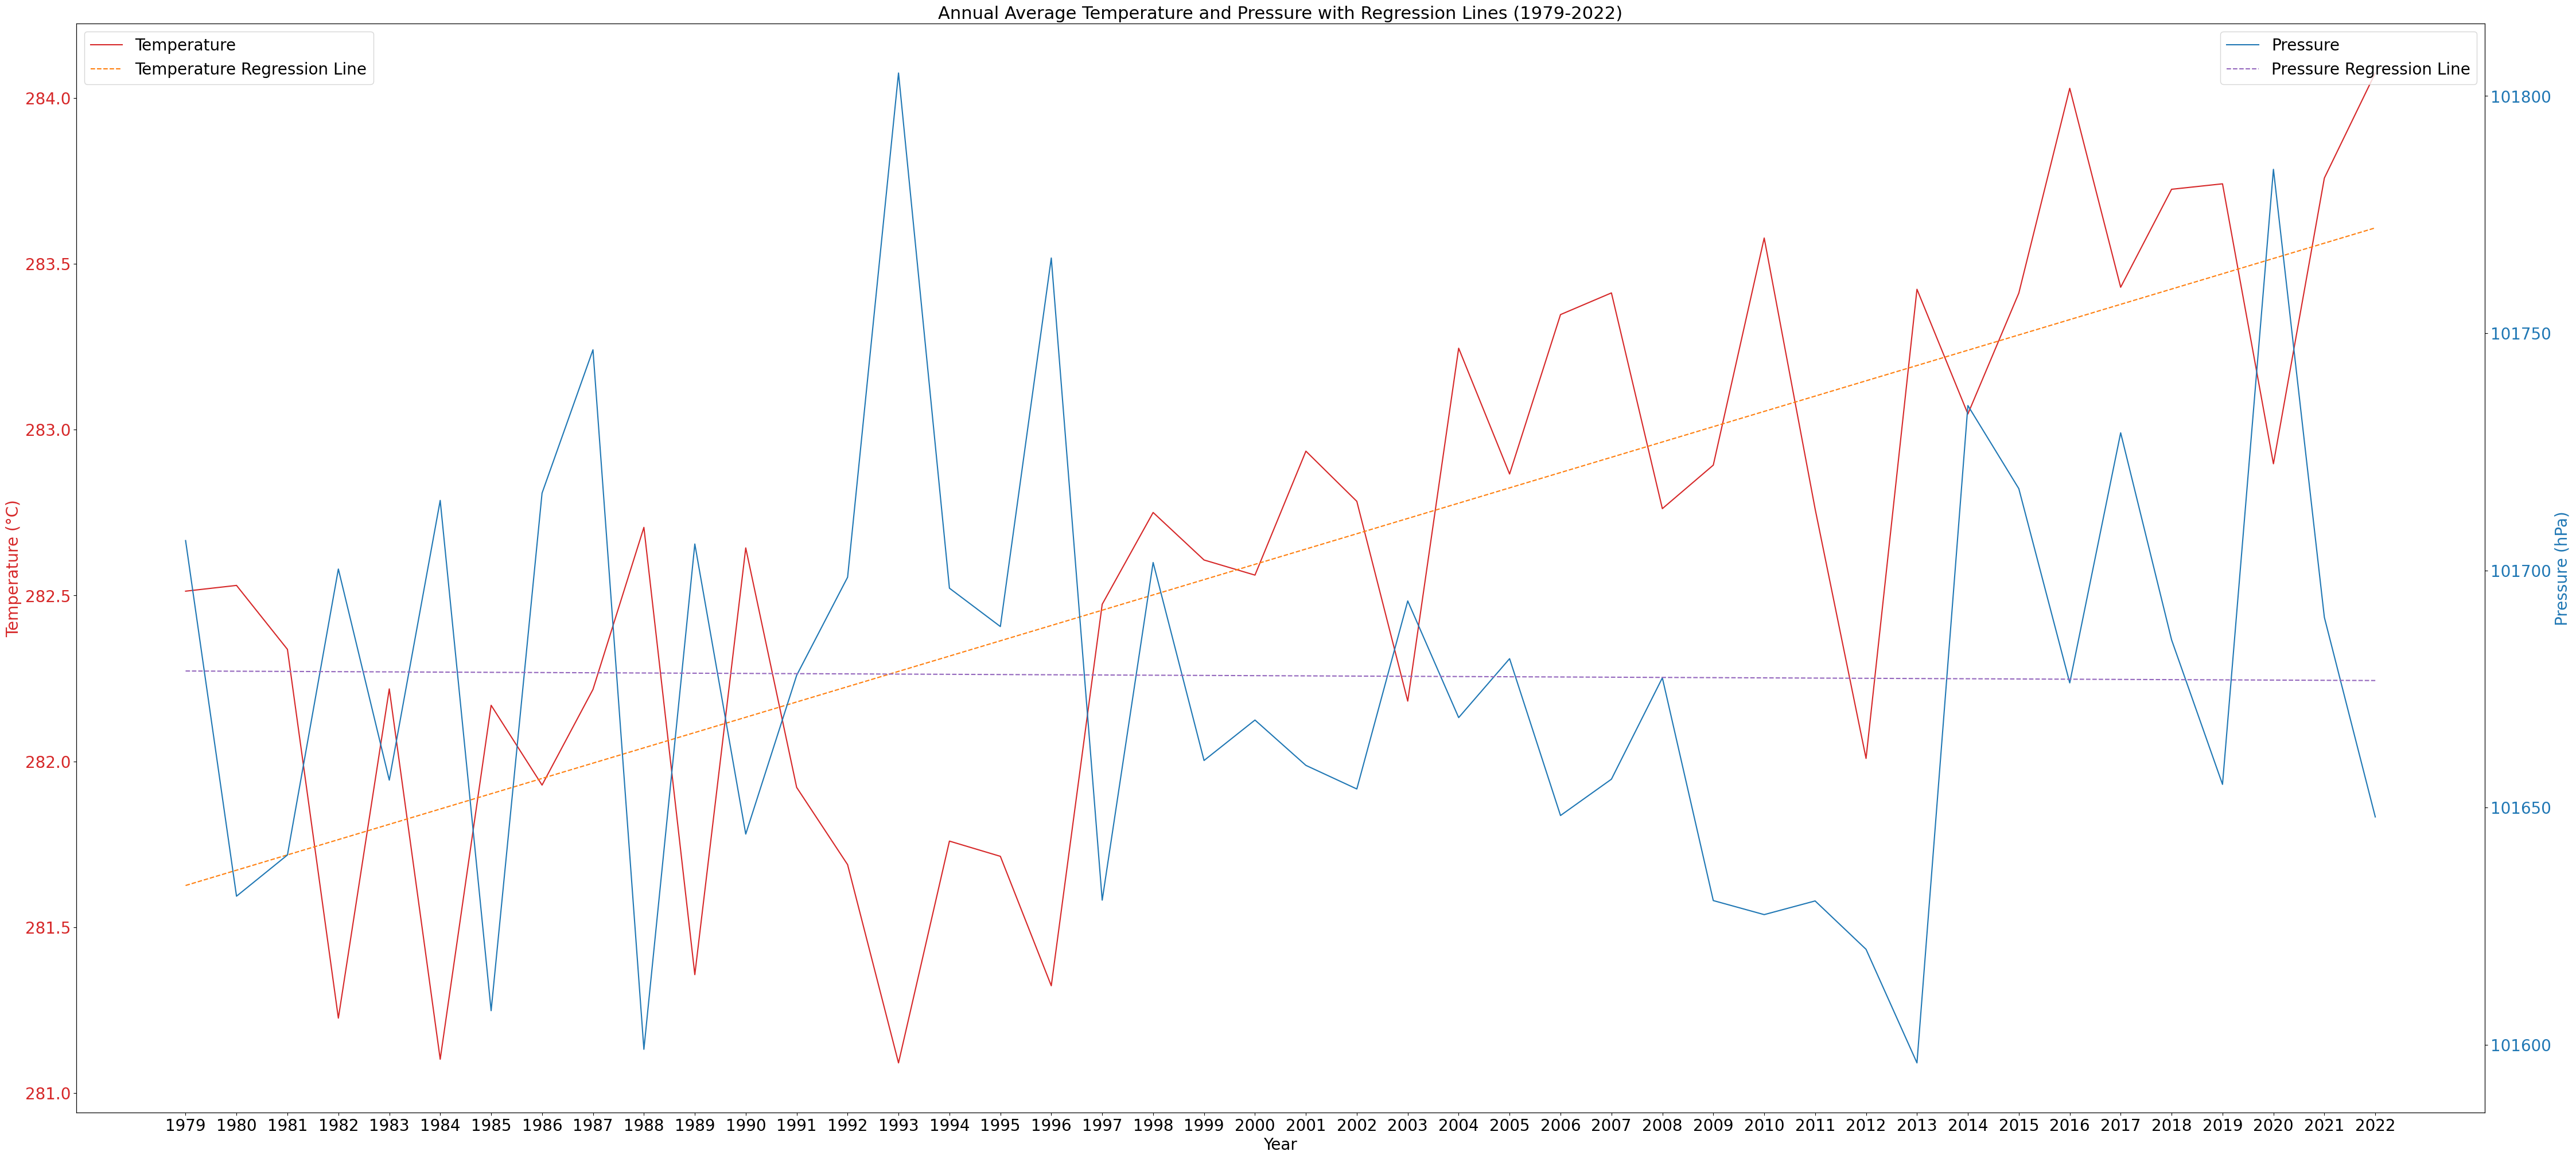

In [24]:
lat_index = 0
lon_index = 0

temperature = ds_t2m['t2m'][:, lat_index, lon_index].values
pressure = ds_slp['msl'][:, lat_index, lon_index].values

# Time processing
t_slp = pd.to_datetime(ds_slp['time'].values)

# Creating DataFrame
df = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure
}, index=t_slp)

# Calculate the annual average temperature and pressure
annual_avg = df.resample('Y').mean()

# Calculate regression line parameters
temp_regress = linregress(annual_avg.index.year, annual_avg['Temperature'])
press_regress = linregress(annual_avg.index.year, annual_avg['Pressure'])

# Drawing the chart, including regression lines
fig, ax1 = plt.subplots(figsize=(45, 20))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=20)  # Increase font size of x-axis labels
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=20)  # Increase font size of y-axis labels
ax1.plot(annual_avg.index.year, annual_avg['Temperature'], color=color, label='Temperature')
ax1.plot(annual_avg.index.year, temp_regress.intercept + temp_regress.slope * annual_avg.index.year,
         color='tab:orange', linestyle='--', label='Temperature Regression Line')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Pressure (hPa)', color=color, fontsize=20)
ax2.plot(annual_avg.index.year, annual_avg['Pressure'], color=color, label='Pressure')
ax2.plot(annual_avg.index.year, press_regress.intercept + press_regress.slope * annual_avg.index.year,
         color='tab:purple', linestyle='--', label='Pressure Regression Line')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

years = np.arange(1979, 2023)  # From 1979 to 2022
ax1.set_xticks(years)
ax1.set_xticklabels(years, fontsize=20)

fig.tight_layout()
plt.title('Annual Average Temperature and Pressure with Regression Lines (1979-2022)', fontsize=22)
ax1.legend(loc="upper left", fontsize=20)
ax2.legend(loc="upper right", fontsize=20)
plt.show()
